In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calmap

In [2]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [3]:
def reduce_mem_usage(df, verbose=False):
    '''
    reduce memory usage by downcasting data types
    from https://www.kaggle.com/harupy/m5-baseline
    '''
    
    start_mem = df.memory_usage().sum() / 1024 ** 2
    int_columns = df.select_dtypes(include=["int"]).columns
    float_columns = df.select_dtypes(include=["float"]).columns

    for col in int_columns:
        df[col] = pd.to_numeric(df[col], downcast="integer")

    for col in float_columns:
        df[col] = pd.to_numeric(df[col], downcast="float")

    end_mem = df.memory_usage().sum() / 1024 ** 2
    if verbose:
        print(
            "Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)".format(
                end_mem, 100 * (start_mem - end_mem) / start_mem
            )
        )
    return df

## Calendar

Notes from the official guide

File 1: “calendar.csv” 
Contains information about the dates the products are sold.
- date: The date in a “y-m-d” format.
- wm_yr_wk: The id of the week the date belongs to.
- weekday: The type of the day (Saturday, Sunday, …, Friday).
- wday: The id of the weekday, starting from Saturday.
- month: The month of the date.
- year: The year of the date.
- event_name_1: If the date includes an event, the name of this event.
- event_type_1: If the date includes an event, the type of this event.
- event_name_2: If the date includes a second event, the name of this event.
- event_type_2: If the date includes a second event, the type of this event.
- snap_CA, snap_TX, and snap_WI: A binary variable (0 or 1) indicating whether the stores of CA, TX or WI allow SNAP  purchases on the examined date. 1 indicates that SNAP purchases are allowed.

In [4]:
%%time

calendar = pd.read_csv('../input_data/calendar.csv').pipe(reduce_mem_usage, verbose=True)
calendar['date'] = pd.to_datetime(calendar['date'])

Mem. usage decreased to  0.12 Mb (41.9% reduction)
CPU times: user 16.5 ms, sys: 2.31 ms, total: 18.8 ms
Wall time: 17.7 ms


### General

In [5]:
calendar.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [6]:
calendar.tail()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
1964,2016-06-15,11620,Wednesday,5,6,2016,d_1965,NaN,NaN,NaN,NaN,0,1,1
1965,2016-06-16,11620,Thursday,6,6,2016,d_1966,NaN,NaN,NaN,NaN,0,0,0
1966,2016-06-17,11620,Friday,7,6,2016,d_1967,NaN,NaN,NaN,NaN,0,0,0
1967,2016-06-18,11621,Saturday,1,6,2016,d_1968,NaN,NaN,NaN,NaN,0,0,0
1968,2016-06-19,11621,Sunday,2,6,2016,d_1969,NBAFinalsEnd,Sporting,Father's day,Cultural,0,0,0


In [7]:
calendar.describe()

,wm_yr_wk,wday,month,year,snap_CA,snap_TX,snap_WI
count,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000
mean,11347.086338,3.997461,6.325546,2013.288471,0.330117,0.330117,0.330117
std,155.277043,2.001141,3.416864,1.580198,0.470374,0.470374,0.470374
min,11101.000000,1.000000,1.000000,2011.000000,0.000000,0.000000,0.000000
25%,11219.000000,2.000000,3.000000,2012.000000,0.000000,0.000000,0.000000
50%,11337.000000,4.000000,6.000000,2013.000000,0.000000,0.000000,0.000000
75%,11502.000000,6.000000,9.000000,2015.000000,1.000000,1.000000,1.000000
max,11621.000000,7.000000,12.000000,2016.000000,1.000000,1.000000,1.000000


In [8]:
len(calendar)

1969

### Events

In [18]:
# get all the event types

calendar.groupby('event_type_1')['date'].count()

event_type_1
Cultural     37
National     52
Religious    55
Sporting     18
Name: date, dtype: int64

In [19]:
calendar.groupby('event_type_2')['date'].count()

event_type_2
Cultural     4
Religious    1
Name: date, dtype: int64

In [17]:
# get all the event names

calendar.groupby('event_name_1')['date'].count()

event_name_1
Chanukah End           5
Christmas              5
Cinco De Mayo          5
ColumbusDay            5
Easter                 5
Eid al-Fitr            5
EidAlAdha              5
Father's day           4
Halloween              5
IndependenceDay        5
LaborDay               5
LentStart              6
LentWeek2              6
MartinLutherKingDay    5
MemorialDay            6
Mother's day           6
NBAFinalsEnd           6
NBAFinalsStart         6
NewYear                5
OrthodoxChristmas      5
OrthodoxEaster         5
Pesach End             6
PresidentsDay          6
Purim End              6
Ramadan starts         6
StPatricksDay          6
SuperBowl              6
Thanksgiving           5
ValentinesDay          6
VeteransDay            5
Name: date, dtype: int64

In [20]:
calendar.groupby('event_name_2')['date'].count()

event_name_2
Cinco De Mayo     1
Easter            1
Father's day      2
OrthodoxEaster    1
Name: date, dtype: int64

In [22]:
## check a few examples

calendar[calendar['event_name_1'] == 'NewYear']

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
337,2012-01-01,11149,Sunday,2,1,2012,d_338,NewYear,National,NaN,NaN,1,1,0
703,2013-01-01,11249,Tuesday,4,1,2013,d_704,NewYear,National,NaN,NaN,1,1,0
1068,2014-01-01,11349,Wednesday,5,1,2014,d_1069,NewYear,National,NaN,NaN,1,1,0
1433,2015-01-01,11448,Thursday,6,1,2015,d_1434,NewYear,National,NaN,NaN,1,1,0
1798,2016-01-01,11548,Friday,7,1,2016,d_1799,NewYear,National,NaN,NaN,1,1,0


# Sales

Notes from the official guide

File 3: “sales_train.csv” 
Contains the historical daily unit sales data per product and store.
- item_id: The id of the product.
- dept_id: The id of the department the product belongs to.
- cat_id: The id of the category the product belongs to.
- store_id: The id of the store where the product is sold.
- state_id: The State where the store is located.
- d_1, d_2, …, d_i, … d_1941: The number of units sold at day i, starting from 2011-01-29. 

In [9]:
%%time

sales = pd.read_csv('../input_data/sales_train_evaluation.csv').pipe(reduce_mem_usage, verbose=True)

Mem. usage decreased to 95.61 Mb (78.9% reduction)
CPU times: user 1min 31s, sys: 33.5 s, total: 2min 5s
Wall time: 2min 5s


### General

In [8]:
sales.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,d_35,d_36,d_37,d_38,d_39,d_40,d_41,d_42,d_43,d_44,d_45,d_46,d_47,d_48,d_49,d_50,d_51,d_52,d_53,d_54,d_55,d_56,d_57,d_58,d_59,d_60,d_61,d_62,d_63,d_64,d_65,d_66,d_67,d_68,d_69,d_70,d_71,d_72,d_73,d_74,d_75,d_76,d_77,d_78,d_79,d_80,d_81,d_82,d_83,d_84,d_85,d_86,d_87,d_88,d_89,d_90,d_91,d_92,d_93,d_94,d_95,d_96,d_97,d_98,d_99,d_100,d_101,d_102,d_103,d_104,d_105,d_106,d_107,d_108,d_109,d_110,d_111,d_112,d_113,d_114,d_115,d_116,d_117,d_118,d_119,d_120,d_121,d_122,d_123,d_124,d_125,d_126,d_127,d_128,d_129,d_130,d_131,d_132,d_133,d_134,d_135,d_136,d_137,d_138,d_139,d_140,d_141,d_142,d_143,d_144,d_145,d_146,d_147,d_148,d_149,d_150,d_151,d_152,d_153,d_154,d_155,d_156,d_157,d_158,d_159,d_160,d_161,d_162,d_163,d_164,d_165,d_166,d_167,d_168,d_169,d_170,d_171,d_172,d_173,d_174,d_175,d_176,d_177,d_178,d_179,d_180,d_181,d_182,d_183,d_184,d_185,d_186,d_187,d_188,d_189,d_190,d_191,d_192,d_193,d_194,d_195,d_196,d_197,d_198,d_199,d_200,d_201,d_202,d_203,d_204,d_205,d_206,d_207,d_208,d_209,d_210,d_211,d_212,d_213,d_214,d_215,d_216,d_217,d_218,d_219,d_220,d_221,d_222,d_223,d_224,d_225,d_226,d_227,d_228,d_229,d_230,d_231,d_232,d_233,d_234,d_235,d_236,d_237,d_238,d_239,d_240,d_241,d_242,d_243,d_244,...,d_1692,d_1693,d_1694,d_1695,d_1696,d_1697,d_1698,d_1699,d_1700,d_1701,d_1702,d_1703,d_1704,d_1705,d_1706,d_1707,d_1708,d_1709,d_1710,d_1711,d_1712,d_1713,d_1714,d_1715,d_1716,d_1717,d_1718,d_1719,d_1720,d_1721,d_1722,d_1723,d_1724,d_1725,d_1726,d_1727,d_1728,d_1729,d_1730,d_1731,d_1732,d_1733,d_1734,d_1735,d_1736,d_1737,d_1738,d_1739,d_1740,d_1741,d_1742,d_1743,d_1744,d_1745,d_1746,d_1747,d_1748,d_1749,d_1750,d_1751,d_1752,d_1753,d_1754,d_1755,d_1756,d_1757,d_1758,d_1759,d_1760,d_1761,d_1762,d_1763,d_1764,d_1765,d_1766,d_1767,d_1768,d_1769,d_1770,d_1771,d_1772,d_1773,d_1774,d_1775,d_1776,d_1777,d_1778,d_1779,d_1780,d_1781,d_1782,d_1783,d_1784,d_1785,d_1786,d_1787,d_1788,d_1789,d_1790,d_1791,d_1792,d_1793,d_1794,d_1795,d_1796,d_1797,d_1798,d_1799,d_1800,d_1801,d_1802,d_1803,d_1804,d_1805,d_1806,d_1807,d_1808,d_1809,d_1810,d_1811,d_1812,d_1813,d_1814,d_1815,d_1816,d_1817,d_1818,d_1819,d_1820,d_1821,d_1822,d_1823,d_1824,d_1825,d_1826,d_1827,d_1828,d_1829,d_1830,d_1831,d_1832,d_1833,d_1834,d_1835,d_1836,d_1837,d_1838,d_1839,d_1840,d_1841,d_1842,d_1843,d_1844,d_1845,d_1846,d_1847,d_1848,d_1849,d_1850,d_1851,d_1852,d_1853,d_1854,d_1855,d_1856,d_1857,d_1858,d_1859,d_1860,d_1861,d_1862,d_1863,d_1864,d_1865,d_1866,d_1867,d_1868,d_1869,d_1870,d_1871,d_1872,d_1873,d_1874,d_1875,d_1876,d_1877,d_1878,d_1879,d_1880,d_1881,d_1882,d_1883,d_1884,d_1885,d_1886,d_1887,d_1888,d_1889,d_1890,d_1891,d_1892,d_1893,d_1894,d_1895,d_1896,d_1897,d_1898,d_1899,d_1900,d_1901,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913,d_1914,d_1915,d_1916,d_1917,d_1918,d_1919,d_1920,d_1921,d_1922,d_1923,d_1924,d_1925,d_1926,d_1927,d_1928,d_1929,d_1930,d_1931,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,1,0,1,0,1,0,3,1,1,0,1,1,2,0,0,0,0,1,1,0,0,0,0,3,0,1,0,0,0,0,1,1,1,0,1,0,2,0,0,0,0,2,0,0,0,0,1,1,2,0,0,0,0,2,0,0,1,1,1,1,0,0,0,0,0,1,2,2,0,1,0,0,0,0,1,2,1,0,0,0,0,0,1,0,3,0,1,2,1,0,3,0,0,0,1,0,2,2,1,0,0,1,2,0,1,0,1,4,0,0,5,0,0,0,0,0,0,2,1,2,1,0,0,0,1,1,1,0,0,1,1,1,1

In [9]:
sales.isna().sum().sum()

0

In [10]:
sales.describe()

,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,d_35,d_36,d_37,d_38,d_39,d_40,d_41,d_42,d_43,d_44,d_45,d_46,d_47,d_48,d_49,d_50,d_51,d_52,d_53,d_54,d_55,d_56,d_57,d_58,d_59,d_60,d_61,d_62,d_63,d_64,d_65,d_66,d_67,d_68,d_69,d_70,d_71,d_72,d_73,d_74,d_75,d_76,d_77,d_78,d_79,d_80,d_81,d_82,d_83,d_84,d_85,d_86,d_87,d_88,d_89,d_90,d_91,d_92,d_93,d_94,d_95,d_96,d_97,d_98,d_99,d_100,d_101,d_102,d_103,d_104,d_105,d_106,d_107,d_108,d_109,d_110,d_111,d_112,d_113,d_114,d_115,d_116,d_117,d_118,d_119,d_120,d_121,d_122,d_123,d_124,d_125,d_126,d_127,d_128,d_129,d_130,d_131,d_132,d_133,d_134,d_135,d_136,d_137,d_138,d_139,d_140,d_141,d_142,d_143,d_144,d_145,d_146,d_147,d_148,d_149,d_150,d_151,d_152,d_153,d_154,d_155,d_156,d_157,d_158,d_159,d_160,d_161,d_162,d_163,d_164,d_165,d_166,d_167,d_168,d_169,d_170,d_171,d_172,d_173,d_174,d_175,d_176,d_177,d_178,d_179,d_180,d_181,d_182,d_183,d_184,d_185,d_186,d_187,d_188,d_189,d_190,d_191,d_192,d_193,d_194,d_195,d_196,d_197,d_198,d_199,d_200,d_201,d_202,d_203,d_204,d_205,d_206,d_207,d_208,d_209,d_210,d_211,d_212,d_213,d_214,d_215,d_216,d_217,d_218,d_219,d_220,d_221,d_222,d_223,d_224,d_225,d_226,d_227,d_228,d_229,d_230,d_231,d_232,d_233,d_234,d_235,d_236,d_237,d_238,d_239,d_240,d_241,d_242,d_243,d_244,d_245,d_246,d_247,d_248,d_249,d_250,...,d_1692,d_1693,d_1694,d_1695,d_1696,d_1697,d_1698,d_1699,d_1700,d_1701,d_1702,d_1703,d_1704,d_1705,d_1706,d_1707,d_1708,d_1709,d_1710,d_1711,d_1712,d_1713,d_1714,d_1715,d_1716,d_1717,d_1718,d_1719,d_1720,d_1721,d_1722,d_1723,d_1724,d_1725,d_1726,d_1727,d_1728,d_1729,d_1730,d_1731,d_1732,d_1733,d_1734,d_1735,d_1736,d_1737,d_1738,d_1739,d_1740,d_1741,d_1742,d_1743,d_1744,d_1745,d_1746,d_1747,d_1748,d_1749,d_1750,d_1751,d_1752,d_1753,d_1754,d_1755,d_1756,d_1757,d_1758,d_1759,d_1760,d_1761,d_1762,d_1763,d_1764,d_1765,d_1766,d_1767,d_1768,d_1769,d_1770,d_1771,d_1772,d_1773,d_1774,d_1775,d_1776,d_1777,d_1778,d_1779,d_1780,d_1781,d_1782,d_1783,d_1784,d_1785,d_1786,d_1787,d_1788,d_1789,d_1790,d_1791,d_1792,d_1793,d_1794,d_1795,d_1796,d_1797,d_1798,d_1799,d_1800,d_1801,d_1802,d_1803,d_1804,d_1805,d_1806,d_1807,d_1808,d_1809,d_1810,d_1811,d_1812,d_1813,d_1814,d_1815,d_1816,d_1817,d_1818,d_1819,d_1820,d_1821,d_1822,d_1823,d_1824,d_1825,d_1826,d_1827,d_1828,d_1829,d_1830,d_1831,d_1832,d_1833,d_1834,d_1835,d_1836,d_1837,d_1838,d_1839,d_1840,d_1841,d_1842,d_1843,d_1844,d_1845,d_1846,d_1847,d_1848,d_1849,d_1850,d_1851,d_1852,d_1853,d_1854,d_1855,d_1856,d_1857,d_1858,d_1859,d_1860,d_1861,d_1862,d_1863,d_1864,d_1865,d_1866,d_1867,d_1868,d_1869,d_1870,d_1871,d_1872,d_1873,d_1874,d_1875,d_1876,d_1877,d_1878,d_1879,d_1880,d_1881,d_1882,d_1883,d_1884,d_1885,d_1886,d_1887,d_1888,d_1889,d_1890,d_1891,d_1892,d_1893,d_1894,d_1895,d_1896,d_1897,d_1898,d_1899,d_1900,d_1901,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913,d_1914,d_1915,d_1916,d_1917,d_1918,d_1919,d_1920,d_1921,d_1922,d_1923,d_1924,d_1925,d_1926,d_1927,d_1928,d_1929,d_1930,d_1931,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
count,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30

In [301]:
sales['item_id'].nunique()

3049

In [302]:
sales['store_id'].unique()

array(['CA_1', 'CA_2', 'CA_3', 'CA_4', 'TX_1', 'TX_2', 'TX_3', 'WI_1',
       'WI_2', 'WI_3'], dtype=object)

In [11]:
len(sales)

30490

## item counts in each store and category

In [311]:
item_counts = sales.groupby(['store_id', 'cat_id']).agg({'item_id':'nunique'}).reset_index()
item_counts.columns = ['store_id', 'cat_id', 'item_counts']

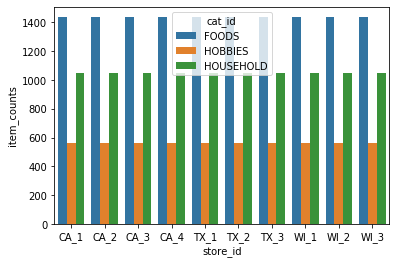

In [312]:
sns.barplot(data=item_counts, x='store_id', y='item_counts', hue='cat_id');

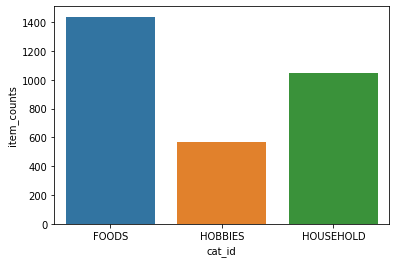

In [313]:
sns.barplot(data=item_counts, x='cat_id', y='item_counts');

In [316]:
# item counts in each store and dept

sales.pivot_table(index='store_id', columns='cat_id', values='item_id', aggfunc='count')

cat_id,FOODS,HOBBIES,HOUSEHOLD
store_id,,,
CA_1,1437,565,1047
CA_2,1437,565,1047
CA_3,1437,565,1047
CA_4,1437,565,1047
TX_1,1437,565,1047
TX_2,1437,565,1047
TX_3,1437,565,1047
WI_1,1437,565,1047
WI_2,1437,565,1047


### Plot the sales over time

In [155]:
np_sales = sales.loc[:, "d_1":].to_numpy().reshape(-1,)

In [156]:
np_sales.shape

(59181090,)

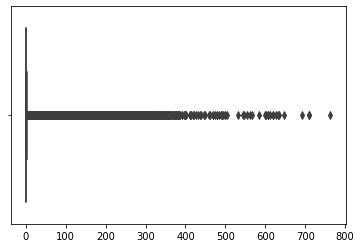

In [163]:
sns.boxplot(np_sales);

In [13]:
sales_by_date = sales.loc[:, "d_1":].T.merge(calendar, left_index=True, right_on='d', how='left').set_index('date')

In [14]:
sales_by_date.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,...,30253,30254,30255,30256,30257,30258,30259,30260,30261,30262,30263,30264,30265,30266,30267,30268,30269,30270,30271,30272,30273,30274,30275,30276,30277,30278,30279,30280,30281,30282,30283,30284,30285,30286,30287,30288,30289,30290,30291,30292,30293,30294,30295,30296,30297,30298,30299,30300,30301,30302,30303,30304,30305,30306,30307,30308,30309,30310,30311,30312,30313,30314,30315,30316,30317,30318,30319,30320,30321,30322,30323,30324,30325,30326,30327,30328,30329,30330,30331,30332,30333,30334,30335,30336,30337,30338,30339,30340,30341,30342,30343,30344,30345,30346,30347,30348,30349,30350,30351,30352,30353,30354,30355,30356,30357,30358,30359,30360,30361,30362,30363,30364,30365,30366,30367,30368,30369,30370,30371,30372,30373,30374,30375,30376,30377,30378,30379,30380,30381,30382,30383,30384,30385,30386,30387,30388,30389,30390,30391,30392,30393,30394,30395,30396,30397,30398,30399,30400,30401,30402,30403,30404,30405,30406,30407,30408,30409,30410,30411,30412,30413,30414,30415,30416,30417,30418,30419,30420,30421,30422,30423,30424,30425,30426,30427,30428,30429,30430,30431,30432,30433,30434,30435,30436,30437,30438,30439,30440,30441,30442,30443,30444,30445,30446,30447,30448,30449,30450,30451,30452,30453,30454,30455,30456,30457,30458,30459,30460,30461,30462,30463,30464,30465,30466,30467,30468,30469,30470,30471,30472,30473,30474,30475,30476,30477,30478,30479,30480,30481,30482,30483,30484,30485,30486,30487,30488,30489,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-01-29,0,0,0,0,0,0,0,12,2,0,0,0,0,0,4,5,0,0,0,0,0,2,2,0,0,0,0,0,2,0,0,9,0,0,0,2,0,0,0,0,0,0,0,3,0,0,1,0,0,2,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,5,2,0,0,0,0,4,0,1,0,1,5,0,0,1,0,0,0,0,2,2,1,0,25,0,0,1,0,4,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,0,0,0,0,0,2,0,0,3,0,0,0,0,0,3,2,0,0,0,0,0,0,0,2,0,0,0,0,3,0,0,0,0,45,0,0,1,0,0,0,0,0,10,0,0,0,0,0,4,0,0,0,8,0,0,0,3,5,0,0,0,0,0,3,2,0,0,0,0,0,0,4,0,0,0,3,0,0,7,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,1,1,0,0,7,0,5,0,0,0,0,0,0,0,0,0,16,0,54,0,...,0,0,2,1,0,0,8,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,5,1,3,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,2,5,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,6,0,0,0,0,12,0,0,1,0,0,3,0,0,1,0,0,0,28,0,0,0,2,0,0,0,0,0,0,13,0,47,2,0,5,0,0,0,4,0,0,0,0,0,0,0,0,57,4,0,47,0,0,0,2,0,0,3,0,40,0,0,0,6,0,3,0,5,0,0,0,2,0,6,0,0,0,0,13,0,4,0,0,3,0,0,32,3,0,17,2,4,0,0,0,0,0,0,0,1,1,8,0,0,0,0,0,0,0,1,0,0,1,0,0,1,13,1,14,0,3,0,0,0,0,0,16,2,1,0,0,0,0,0,36,0,0,0,14,0,0,7,4,0,0,0,0,0,0,0,0,0,0,14,1,0,4,0,0,0,0,0,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
2011-

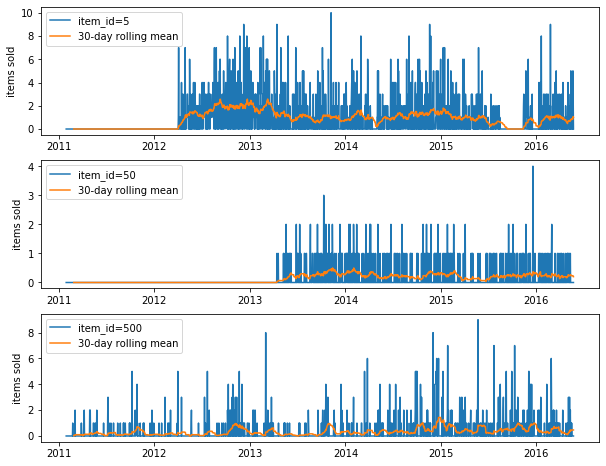

In [91]:
sample_items = [5, 50, 500]

fig, axes = plt.subplots(len(sample_items), 1, figsize=(10, 8))
for i, sample_item in enumerate(sample_items):
    axes[i].plot(sales_by_date.index, sales_by_date[sample_item], label='item_id={}'.format(sample_item))
    axes[i].plot(sales_by_date.index, sales_by_date[sample_item].rolling(30).mean(), label='30-day rolling mean')
    axes[i].set_ylabel('items sold')
    axes[i].legend()

## Sales + Price histogram

In [175]:
%%time

sales_by_date = pd.read_pickle("../saved_data/sales_by_date_raw.pkl")

CPU times: user 21.5 s, sys: 21.7 s, total: 43.2 s
Wall time: 50.3 s


In [372]:
sales_by_date = sales_by_date.pipe(reduce_mem_usage, verbose=True)

Mem. usage decreased to 6698.68 Mb (4.9% reduction)


In [181]:
sales_price = sales_by_date[['items_sold', 'sell_price']].fillna(-1).pipe(reduce_mem_usage, verbose=True)

Mem. usage decreased to 801.55 Mb (30.0% reduction)


CPU times: user 1.53 s, sys: 14.9 ms, total: 1.54 s
Wall time: 1.54 s


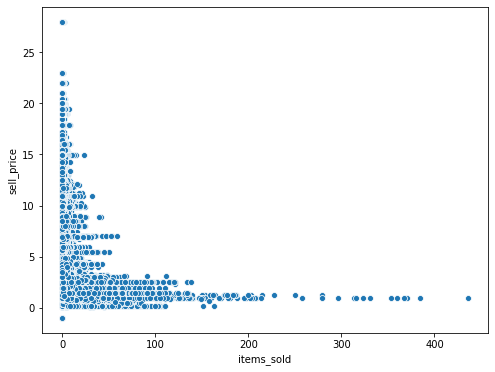

In [196]:
%%time

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.scatterplot(data=sales_price.loc[:1000000, :], x='items_sold', y='sell_price', ax=ax);

In [212]:
sales_price.shape

(60034810, 2)

In [241]:
valid_price = sales_price[sales_price['sell_price'] > -1]

In [242]:
valid_price.shape

(47735397, 2)

In [213]:
47735397/60034810

0.7951286428656974

In [216]:
nonzero = sales_price[(sales_price['sell_price'] > -1) & (sales_price['items_sold'] > 0)]

In [217]:
nonzero.shape

(18939271, 2)

In [215]:
18939271/60034810

0.31547149062352325

In [236]:
18939271/47735397

0.3967552841343291

CPU times: user 29.3 s, sys: 178 ms, total: 29.5 s
Wall time: 29.5 s


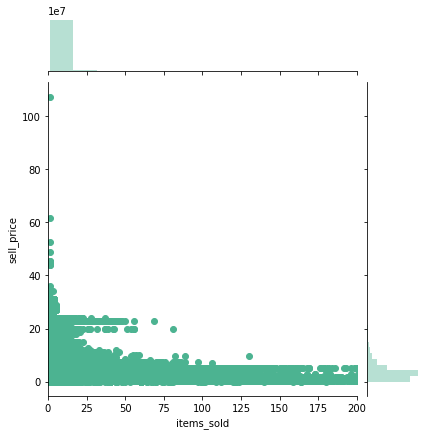

In [234]:
%%time

sns.jointplot(data=nonzero, x='items_sold', y='sell_price', color="#4CB391", xlim=(0, 200));

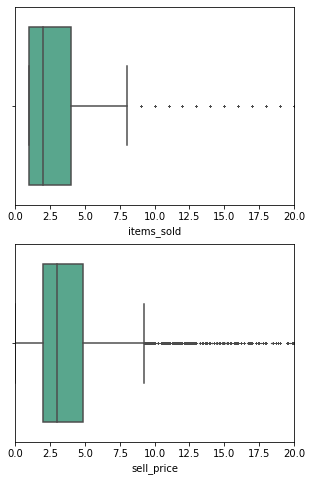

In [238]:
fig, axes = plt.subplots(2, 1, figsize=(5, 8))
sns.boxplot(data=nonzero, x='items_sold', ax=axes[0], orient="h", color="#4CB391", fliersize=0.5)
sns.boxplot(data=nonzero, x='sell_price', ax=axes[1], orient="h", color="#4CB391", fliersize=0.5)

axes[0].set_xlim([0,20])
axes[1].set_xlim([0,20])
plt.show()

### Plot the sales aggregated by stores

In [10]:
sales_by_store = sales.groupby('store_id').sum().loc[:, "d_1":].T.merge(calendar, left_index=True, right_on='d', how='left').set_index('date')

In [11]:
sales_by_store.head()

,CA_1,CA_2,CA_3,CA_4,TX_1,TX_2,TX_3,WI_1,WI_2,WI_3,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
date,,,,,,,,,,,,,,,,,,,,,,,
2011-01-29,4337.0,3494.0,4739.0,1625.0,2556.0,3852.0,3030.0,2704.0,2256.0,4038.0,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
2011-01-30,4155.0,3046.0,4827.0,1777.0,2687.0,3937.0,3006.0,2194.0,1922.0,4198.0,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2011-01-31,2816.0,2121.0,3785.0,1386.0,1822.0,2731.0,2225.0,1562.0,2018.0,3317.0,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
2011-02-01,3051.0,2324.0,4232.0,1440.0,2258.0,2954.0,2169.0,1251.0,2522.0,3211.0,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
2011-02-02,2630.0,1942.0,3817.0,1536.0,1694.0,2492.0,1726.0,2.0,1175.0,2132.0,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


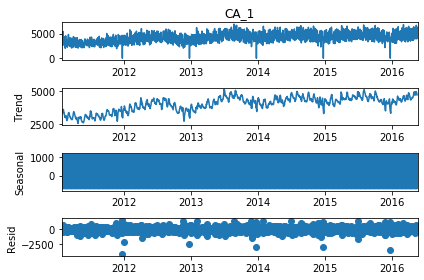

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose
days_per_week = 7

time_series = sales_by_store["CA_1"]
sj_sc = seasonal_decompose(time_series, period = days_per_week)
sj_sc.plot()

plt.show()

In [23]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, window = 12, cutoff = 0.01):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window).mean()
    rolstd = timeseries.rolling(window).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='{} Day Rolling Mean'.format(window))
    std = plt.plot(rolstd, color='black', label = '{} Day Rolling Std'.format(window))
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC', maxlag = 20)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    pvalue = dftest[1]
    if pvalue < cutoff:
        print('p-value = %.4f. The series is likely stationary.' % pvalue)
    else:
        print('p-value = %.4f. The series is likely non-stationary.' % pvalue)
    
    print(dfoutput)

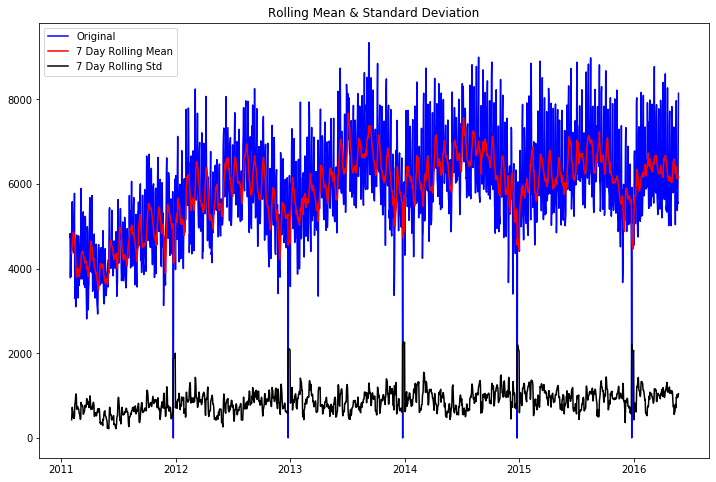

Results of Dickey-Fuller Test:
p-value = 0.0217. The series is likely stationary.
Test Statistic                   -3.172147
p-value                           0.021655
#Lags Used                       20.000000
Number of Observations Used    1920.000000
Critical Value (1%)              -3.433760
Critical Value (5%)              -2.863047
Critical Value (10%)             -2.567572
dtype: float64


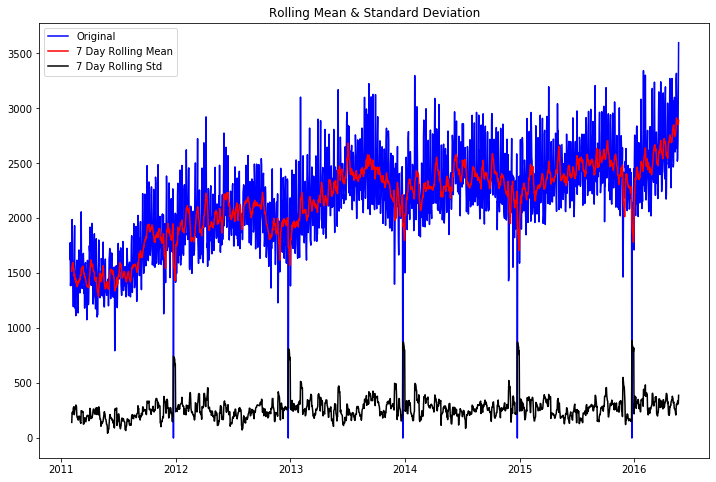

Results of Dickey-Fuller Test:
p-value = 0.4009. The series is likely non-stationary.
Test Statistic                   -1.759237
p-value                           0.400879
#Lags Used                       20.000000
Number of Observations Used    1920.000000
Critical Value (1%)              -3.433760
Critical Value (5%)              -2.863047
Critical Value (10%)             -2.567572
dtype: float64


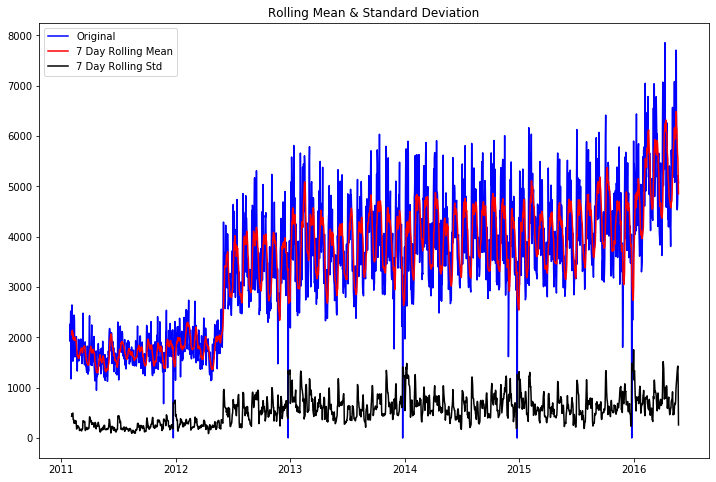

Results of Dickey-Fuller Test:
p-value = 0.3618. The series is likely non-stationary.
Test Statistic                   -1.838027
p-value                           0.361753
#Lags Used                       20.000000
Number of Observations Used    1920.000000
Critical Value (1%)              -3.433760
Critical Value (5%)              -2.863047
Critical Value (10%)             -2.567572
dtype: float64


In [43]:
for store in ['CA_3', 'CA_4', 'WI_2']:
    data = sales_by_store[store]
    time_series = data
    test_stationarity(time_series, 7, 0.05)

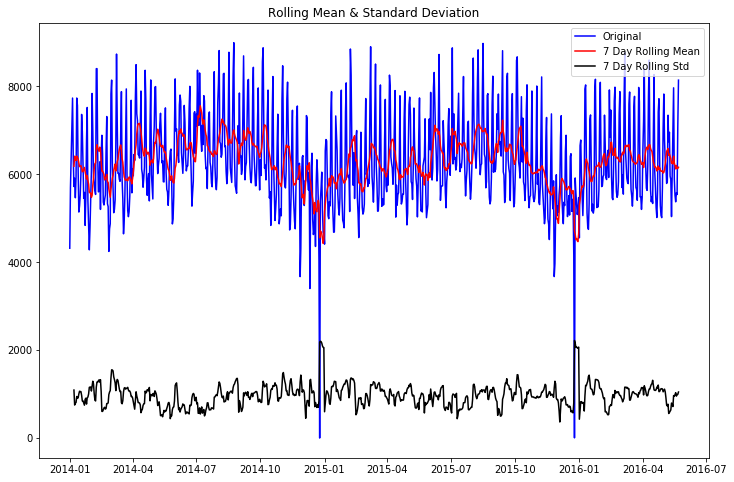

Results of Dickey-Fuller Test:
p-value = 0.0148. The series is likely stationary.
Test Statistic                  -3.302100
p-value                          0.014785
#Lags Used                      20.000000
Number of Observations Used    852.000000
Critical Value (1%)             -3.438048
Critical Value (5%)             -2.864938
Critical Value (10%)            -2.568580
dtype: float64


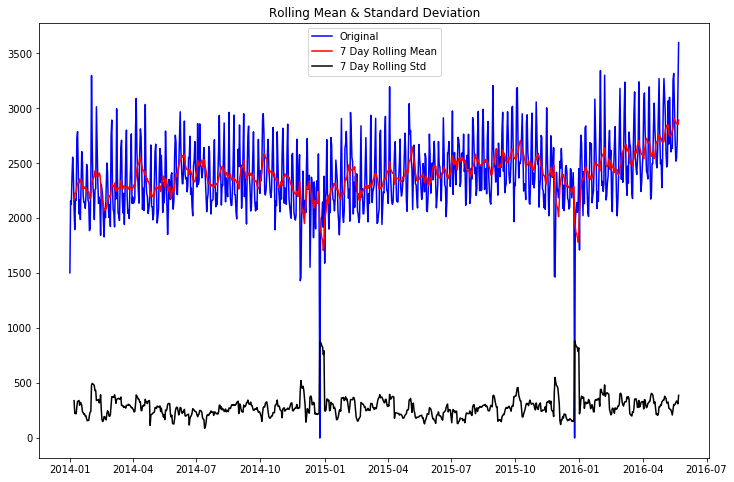

Results of Dickey-Fuller Test:
p-value = 0.3763. The series is likely non-stationary.
Test Statistic                  -1.808409
p-value                          0.376295
#Lags Used                      20.000000
Number of Observations Used    852.000000
Critical Value (1%)             -3.438048
Critical Value (5%)             -2.864938
Critical Value (10%)            -2.568580
dtype: float64


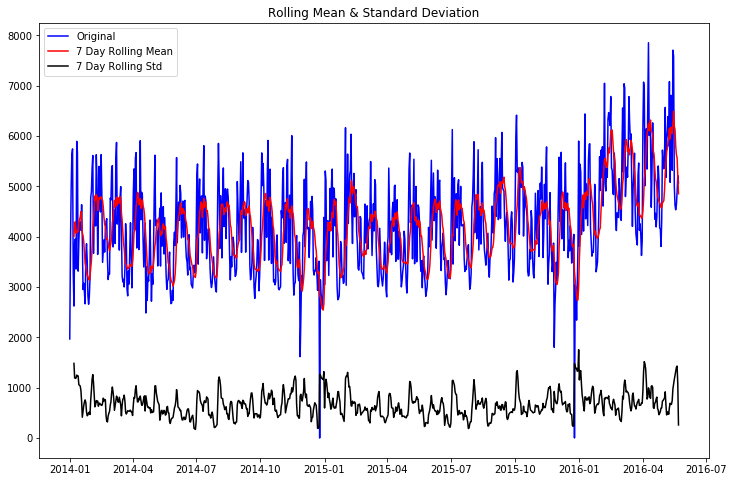

Results of Dickey-Fuller Test:
p-value = 0.0309. The series is likely stationary.
Test Statistic                  -3.044873
p-value                          0.030911
#Lags Used                      20.000000
Number of Observations Used    852.000000
Critical Value (1%)             -3.438048
Critical Value (5%)             -2.864938
Critical Value (10%)            -2.568580
dtype: float64


In [45]:
for store in ['CA_3', 'CA_4', 'WI_2']:
    data = sales_by_store['2014-01-01':][store]
    #time_series = (data - data.shift(7))[7:]
    time_series = data
    test_stationarity(time_series, 7, 0.05)

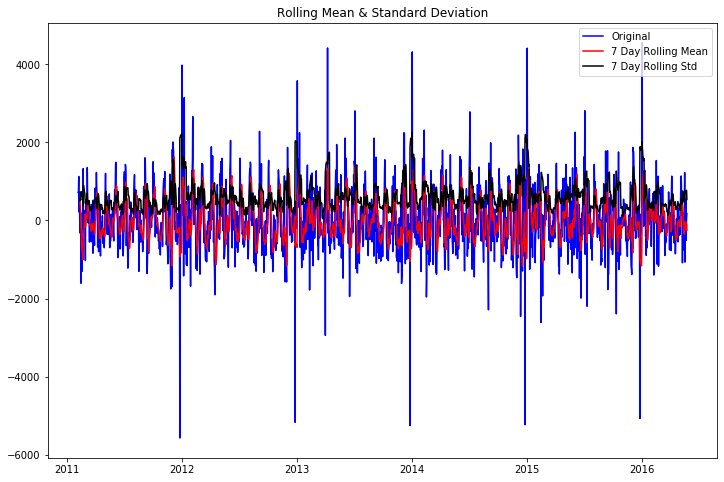

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                  -21.427458
p-value                           0.000000
#Lags Used                       20.000000
Number of Observations Used    1913.000000
Critical Value (1%)              -3.433773
Critical Value (5%)              -2.863052
Critical Value (10%)             -2.567575
dtype: float64


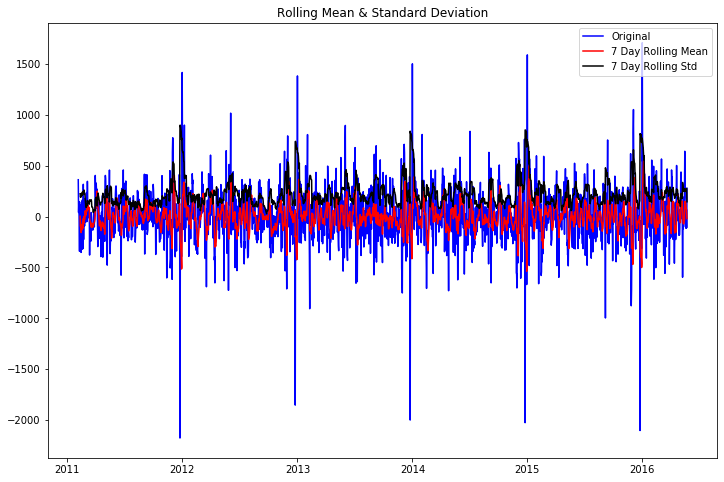

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                -1.736636e+01
p-value                        5.168319e-30
#Lags Used                     2.000000e+01
Number of Observations Used    1.913000e+03
Critical Value (1%)           -3.433773e+00
Critical Value (5%)           -2.863052e+00
Critical Value (10%)          -2.567575e+00
dtype: float64


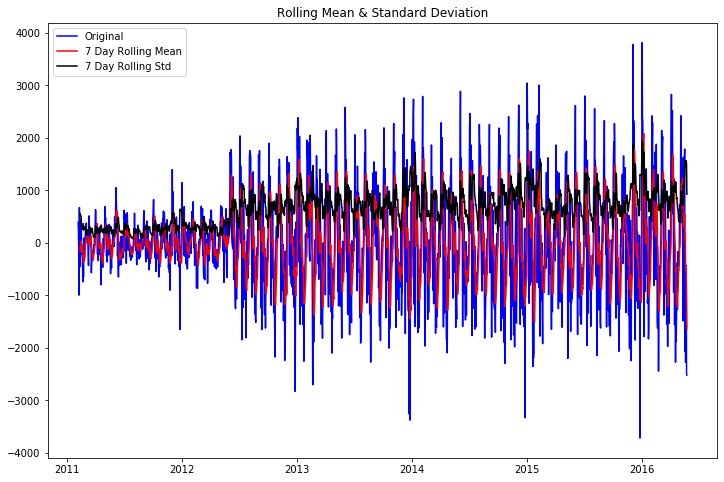

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                  -27.440637
p-value                           0.000000
#Lags Used                       20.000000
Number of Observations Used    1913.000000
Critical Value (1%)              -3.433773
Critical Value (5%)              -2.863052
Critical Value (10%)             -2.567575
dtype: float64


In [47]:
for store in ['CA_3', 'CA_4', 'WI_2']:
    data = sales_by_store[store]
    time_series = (data - data.shift(7))[7:]
    test_stationarity(time_series, 7, 0.05)

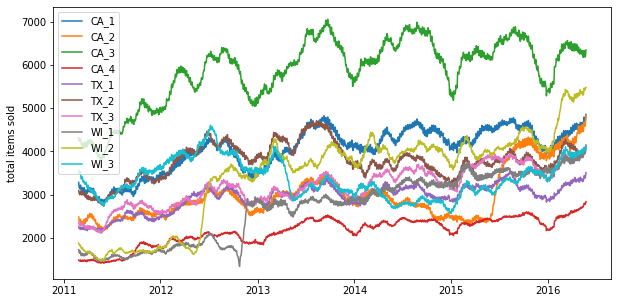

In [32]:
stores = sales_by_store.columns[:10]

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

for i, store in enumerate(stores):
    ax.plot(sales_by_store.index, sales_by_store[store].rolling(30).mean(), label='{}'.format(store))
    ax.set_ylabel('total items sold')

ax.legend()
plt.show()

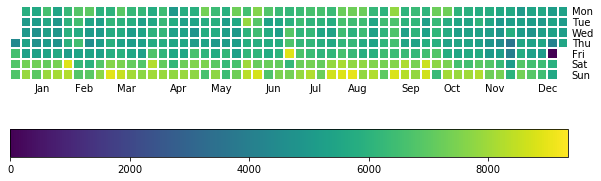

In [331]:
# visualize the CA-3 store using the calendar heatmap

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
calmap.yearplot(sales_by_store['CA_3'], year=2015, ax=ax, fillcolor='grey', cmap="viridis")
fig.colorbar(ax.get_children()[1], ax=ax, orientation='horizontal')
plt.show()

In [79]:
nonzero_items_by_store = sales.groupby('store_id').agg(lambda x: x.ne(0).sum()).loc[:, "d_1":].T.merge(calendar, left_index=True, right_on='d', how='left').set_index('date')

In [85]:
nonzero_items_by_store.head()

,CA_1,CA_2,CA_3,CA_4,TX_1,TX_2,TX_3,WI_1,WI_2,WI_3,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
date,,,,,,,,,,,,,,,,,,,,,,,
2011-01-29,837,724,872,588,662,779,663,603,493,758,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
2011-01-30,778,717,847,591,676,803,667,569,474,758,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2011-01-31,681,587,760,505,551,709,602,450,448,697,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
2011-02-01,700,586,809,536,564,669,585,390,473,660,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
2011-02-02,658,586,745,551,537,688,483,1,314,505,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [82]:
nonzero_items_sum = nonzero_items_by_store.groupby('year').sum()

In [84]:
nonzero_items_sum

,CA_1,CA_2,CA_3,CA_4,TX_1,TX_2,TX_3,WI_1,WI_2,WI_3,wm_yr_wk,wday,month,snap_CA,snap_TX,snap_WI
year,,,,,,,,,,,,,,,,
2011,262792,228893,295040,202440,222349,262695,216342,183122,156300,249704,3748981.0,1345.0,2354.0,110.0,110.0,110.0
2012,350436,295814,378503,270422,291499,342335,287874,246292,257765,319091,4106244.0,1461.0,2384.0,120.0,120.0,120.0
2013,399604,339521,445720,307075,320116,382485,324743,352995,343119,322189,4131695.0,1460.0,2382.0,120.0,120.0,120.0
2014,445655,350333,507914,341740,350451,389446,373396,412335,384090,336643,4167625.0,1461.0,2382.0,120.0,120.0,120.0
2015,486780,425751,550168,375604,388628,433714,413562,457554,418328,375535,4204194.0,1462.0,2382.0,120.0,120.0,120.0
2016,199512,205529,225421,159818,160130,182889,176378,196871,187421,170400,1658348.0,570.0,412.0,50.0,50.0,50.0


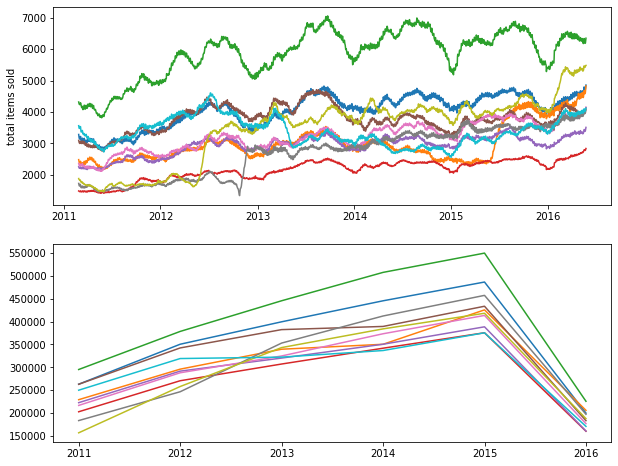

In [95]:
stores = sales_by_store.columns[:10]

fig, axes = plt.subplots(2, 1, figsize=(10, 8))

for i, store in enumerate(stores):
    axes[0].plot(sales_by_store.index, sales_by_store[store].rolling(30).mean(), label='{}'.format(store))
    axes[0].set_ylabel('total items sold')
    
    axes[1].plot(nonzero_items_sum.index, nonzero_items_sum[store])

ax.legend()
plt.show()

### Plot the sales aggregated by category

In [285]:
sales.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,d_35,d_36,d_37,d_38,d_39,d_40,d_41,d_42,d_43,d_44,d_45,d_46,d_47,d_48,d_49,d_50,d_51,d_52,d_53,d_54,d_55,d_56,d_57,d_58,d_59,d_60,d_61,d_62,d_63,d_64,d_65,d_66,d_67,d_68,d_69,d_70,d_71,d_72,d_73,d_74,d_75,d_76,d_77,d_78,d_79,d_80,d_81,d_82,d_83,d_84,d_85,d_86,d_87,d_88,d_89,d_90,d_91,d_92,d_93,d_94,d_95,d_96,d_97,d_98,d_99,d_100,d_101,d_102,d_103,d_104,d_105,d_106,d_107,d_108,d_109,d_110,d_111,d_112,d_113,d_114,d_115,d_116,d_117,d_118,d_119,d_120,d_121,d_122,d_123,d_124,d_125,d_126,d_127,d_128,d_129,d_130,d_131,d_132,d_133,d_134,d_135,d_136,d_137,d_138,d_139,d_140,d_141,d_142,d_143,d_144,d_145,d_146,d_147,d_148,d_149,d_150,d_151,d_152,d_153,d_154,d_155,d_156,d_157,d_158,d_159,d_160,d_161,d_162,d_163,d_164,d_165,d_166,d_167,d_168,d_169,d_170,d_171,d_172,d_173,d_174,d_175,d_176,d_177,d_178,d_179,d_180,d_181,d_182,d_183,d_184,d_185,d_186,d_187,d_188,d_189,d_190,d_191,d_192,d_193,d_194,d_195,d_196,d_197,d_198,d_199,d_200,d_201,d_202,d_203,d_204,d_205,d_206,d_207,d_208,d_209,d_210,d_211,d_212,d_213,d_214,d_215,d_216,d_217,d_218,d_219,d_220,d_221,d_222,d_223,d_224,d_225,d_226,d_227,d_228,d_229,d_230,d_231,d_232,d_233,d_234,d_235,d_236,d_237,d_238,d_239,d_240,d_241,d_242,d_243,d_244,...,d_1692,d_1693,d_1694,d_1695,d_1696,d_1697,d_1698,d_1699,d_1700,d_1701,d_1702,d_1703,d_1704,d_1705,d_1706,d_1707,d_1708,d_1709,d_1710,d_1711,d_1712,d_1713,d_1714,d_1715,d_1716,d_1717,d_1718,d_1719,d_1720,d_1721,d_1722,d_1723,d_1724,d_1725,d_1726,d_1727,d_1728,d_1729,d_1730,d_1731,d_1732,d_1733,d_1734,d_1735,d_1736,d_1737,d_1738,d_1739,d_1740,d_1741,d_1742,d_1743,d_1744,d_1745,d_1746,d_1747,d_1748,d_1749,d_1750,d_1751,d_1752,d_1753,d_1754,d_1755,d_1756,d_1757,d_1758,d_1759,d_1760,d_1761,d_1762,d_1763,d_1764,d_1765,d_1766,d_1767,d_1768,d_1769,d_1770,d_1771,d_1772,d_1773,d_1774,d_1775,d_1776,d_1777,d_1778,d_1779,d_1780,d_1781,d_1782,d_1783,d_1784,d_1785,d_1786,d_1787,d_1788,d_1789,d_1790,d_1791,d_1792,d_1793,d_1794,d_1795,d_1796,d_1797,d_1798,d_1799,d_1800,d_1801,d_1802,d_1803,d_1804,d_1805,d_1806,d_1807,d_1808,d_1809,d_1810,d_1811,d_1812,d_1813,d_1814,d_1815,d_1816,d_1817,d_1818,d_1819,d_1820,d_1821,d_1822,d_1823,d_1824,d_1825,d_1826,d_1827,d_1828,d_1829,d_1830,d_1831,d_1832,d_1833,d_1834,d_1835,d_1836,d_1837,d_1838,d_1839,d_1840,d_1841,d_1842,d_1843,d_1844,d_1845,d_1846,d_1847,d_1848,d_1849,d_1850,d_1851,d_1852,d_1853,d_1854,d_1855,d_1856,d_1857,d_1858,d_1859,d_1860,d_1861,d_1862,d_1863,d_1864,d_1865,d_1866,d_1867,d_1868,d_1869,d_1870,d_1871,d_1872,d_1873,d_1874,d_1875,d_1876,d_1877,d_1878,d_1879,d_1880,d_1881,d_1882,d_1883,d_1884,d_1885,d_1886,d_1887,d_1888,d_1889,d_1890,d_1891,d_1892,d_1893,d_1894,d_1895,d_1896,d_1897,d_1898,d_1899,d_1900,d_1901,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913,d_1914,d_1915,d_1916,d_1917,d_1918,d_1919,d_1920,d_1921,d_1922,d_1923,d_1924,d_1925,d_1926,d_1927,d_1928,d_1929,d_1930,d_1931,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,1,0,1,0,1,0,3,1,1,0,1,1,2,0,0,0,0,1,1,0,0,0,0,3,0,1,0,0,0,0,1,1,1,0,1,0,2,0,0,0,0,2,0,0,0,0,1,1,2,0,0,0,0,2,0,0,1,1,1,1,0,0,0,0,0,1,2,2,0,1,0,0,0,0,1,2,1,0,0,0,0,0,1,0,3,0,1,2,1,0,3,0,0,0,1,0,2,2,1,0,0,1,2,0,1,0,1,4,0,0,5,0,0,0,0,0,0,2,1,2,1,0,0,0,1,1,1,0,0,1,1,1,1

In [142]:
stores = sales['store_id'].unique()

sales_by_cat_master = None
for store_id in stores:
    sales_by_cat = sales[sales['store_id'] == store_id].groupby('cat_id').sum().loc[:, "d_1":].T.merge(calendar, left_index=True, right_on='d', how='left').set_index('date')
    sales_by_cat_melt = pd.melt(sales_by_cat.reset_index(), id_vars='date', value_vars=['FOODS', 'HOBBIES', 'HOUSEHOLD'], var_name='cat_id', value_name='items_sold')
    sales_by_cat_melt['store_id'] = store_id
    
    if sales_by_cat_master is not None:
        sales_by_cat_master = sales_by_cat_master.append(sales_by_cat_melt)
    else:
        sales_by_cat_master = sales_by_cat_melt

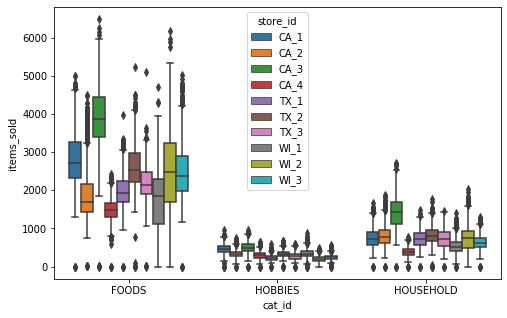

In [317]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

sns.boxplot(data=sales_by_cat_master, x='cat_id', y='items_sold', hue='store_id', ax=ax);

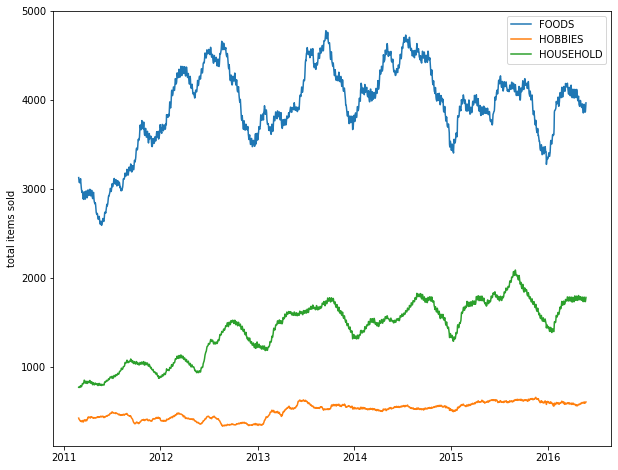

In [123]:
item_cats = sales_by_cat.columns[:3]

fig, ax = plt.subplots(1, 1, figsize=(10, 8))

for i, cat in enumerate(item_cats):
    sns.barplot(sales_by_cat_melt.date, sales_by_cat_melt['items_sold'].rolling(30).mean(), label=cat, stacked=True)

ax.set_ylabel('total items sold')
ax.legend()
plt.show()

## sell_prices aggregated by category

In [287]:
sell_prices = pd.read_csv('../input_data/sell_prices.csv').pipe(reduce_mem_usage, verbose=True)

Mem. usage decreased to 143.53 Mb (31.2% reduction)


In [291]:
sales.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,d_35,d_36,d_37,d_38,d_39,d_40,d_41,d_42,d_43,d_44,d_45,d_46,d_47,d_48,d_49,d_50,d_51,d_52,d_53,d_54,d_55,d_56,d_57,d_58,d_59,d_60,d_61,d_62,d_63,d_64,d_65,d_66,d_67,d_68,d_69,d_70,d_71,d_72,d_73,d_74,d_75,d_76,d_77,d_78,d_79,d_80,d_81,d_82,d_83,d_84,d_85,d_86,d_87,d_88,d_89,d_90,d_91,d_92,d_93,d_94,d_95,d_96,d_97,d_98,d_99,d_100,d_101,d_102,d_103,d_104,d_105,d_106,d_107,d_108,d_109,d_110,d_111,d_112,d_113,d_114,d_115,d_116,d_117,d_118,d_119,d_120,d_121,d_122,d_123,d_124,d_125,d_126,d_127,d_128,d_129,d_130,d_131,d_132,d_133,d_134,d_135,d_136,d_137,d_138,d_139,d_140,d_141,d_142,d_143,d_144,d_145,d_146,d_147,d_148,d_149,d_150,d_151,d_152,d_153,d_154,d_155,d_156,d_157,d_158,d_159,d_160,d_161,d_162,d_163,d_164,d_165,d_166,d_167,d_168,d_169,d_170,d_171,d_172,d_173,d_174,d_175,d_176,d_177,d_178,d_179,d_180,d_181,d_182,d_183,d_184,d_185,d_186,d_187,d_188,d_189,d_190,d_191,d_192,d_193,d_194,d_195,d_196,d_197,d_198,d_199,d_200,d_201,d_202,d_203,d_204,d_205,d_206,d_207,d_208,d_209,d_210,d_211,d_212,d_213,d_214,d_215,d_216,d_217,d_218,d_219,d_220,d_221,d_222,d_223,d_224,d_225,d_226,d_227,d_228,d_229,d_230,d_231,d_232,d_233,d_234,d_235,d_236,d_237,d_238,d_239,d_240,d_241,d_242,d_243,d_244,...,d_1692,d_1693,d_1694,d_1695,d_1696,d_1697,d_1698,d_1699,d_1700,d_1701,d_1702,d_1703,d_1704,d_1705,d_1706,d_1707,d_1708,d_1709,d_1710,d_1711,d_1712,d_1713,d_1714,d_1715,d_1716,d_1717,d_1718,d_1719,d_1720,d_1721,d_1722,d_1723,d_1724,d_1725,d_1726,d_1727,d_1728,d_1729,d_1730,d_1731,d_1732,d_1733,d_1734,d_1735,d_1736,d_1737,d_1738,d_1739,d_1740,d_1741,d_1742,d_1743,d_1744,d_1745,d_1746,d_1747,d_1748,d_1749,d_1750,d_1751,d_1752,d_1753,d_1754,d_1755,d_1756,d_1757,d_1758,d_1759,d_1760,d_1761,d_1762,d_1763,d_1764,d_1765,d_1766,d_1767,d_1768,d_1769,d_1770,d_1771,d_1772,d_1773,d_1774,d_1775,d_1776,d_1777,d_1778,d_1779,d_1780,d_1781,d_1782,d_1783,d_1784,d_1785,d_1786,d_1787,d_1788,d_1789,d_1790,d_1791,d_1792,d_1793,d_1794,d_1795,d_1796,d_1797,d_1798,d_1799,d_1800,d_1801,d_1802,d_1803,d_1804,d_1805,d_1806,d_1807,d_1808,d_1809,d_1810,d_1811,d_1812,d_1813,d_1814,d_1815,d_1816,d_1817,d_1818,d_1819,d_1820,d_1821,d_1822,d_1823,d_1824,d_1825,d_1826,d_1827,d_1828,d_1829,d_1830,d_1831,d_1832,d_1833,d_1834,d_1835,d_1836,d_1837,d_1838,d_1839,d_1840,d_1841,d_1842,d_1843,d_1844,d_1845,d_1846,d_1847,d_1848,d_1849,d_1850,d_1851,d_1852,d_1853,d_1854,d_1855,d_1856,d_1857,d_1858,d_1859,d_1860,d_1861,d_1862,d_1863,d_1864,d_1865,d_1866,d_1867,d_1868,d_1869,d_1870,d_1871,d_1872,d_1873,d_1874,d_1875,d_1876,d_1877,d_1878,d_1879,d_1880,d_1881,d_1882,d_1883,d_1884,d_1885,d_1886,d_1887,d_1888,d_1889,d_1890,d_1891,d_1892,d_1893,d_1894,d_1895,d_1896,d_1897,d_1898,d_1899,d_1900,d_1901,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913,d_1914,d_1915,d_1916,d_1917,d_1918,d_1919,d_1920,d_1921,d_1922,d_1923,d_1924,d_1925,d_1926,d_1927,d_1928,d_1929,d_1930,d_1931,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,1,0,1,0,1,0,3,1,1,0,1,1,2,0,0,0,0,1,1,0,0,0,0,3,0,1,0,0,0,0,1,1,1,0,1,0,2,0,0,0,0,2,0,0,0,0,1,1,2,0,0,0,0,2,0,0,1,1,1,1,0,0,0,0,0,1,2,2,0,1,0,0,0,0,1,2,1,0,0,0,0,0,1,0,3,0,1,2,1,0,3,0,0,0,1,0,2,2,1,0,0,1,2,0,1,0,1,4,0,0,5,0,0,0,0,0,0,2,1,2,1,0,0,0,1,1,1,0,0,1,1,1,1

In [293]:
prices = sell_prices.merge(sales[['item_id', 'cat_id', 'store_id']], on=['item_id', 'store_id'])

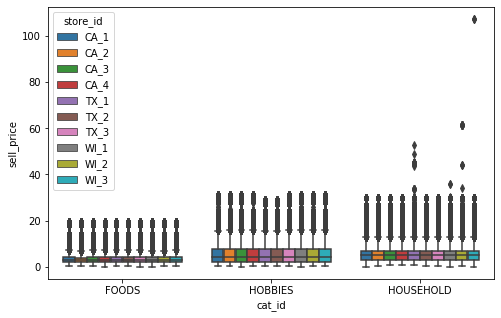

In [318]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

sns.boxplot(data=prices, x='cat_id', y='sell_price', hue='store_id', order=['FOODS', 'HOBBIES', 'HOUSEHOLD'], ax=ax);

### Holiday Season Investigation

In [341]:
sales_by_cat_CA3 = sales[sales['store_id'] == 'CA_3'].groupby('cat_id').sum().loc[:, "d_1":].T.merge(calendar, left_index=True, right_on='d', how='left').set_index('date')['2015-01-01':'2016-01-01']

In [342]:
sales_by_cat_CA3.head()

,FOODS,HOBBIES,HOUSEHOLD,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
date,,,,,,,,,,,,,,,,
2015-01-01,2701.0,538.0,1173.0,11448,Thursday,6,1,2015,d_1434,NewYear,National,NaN,NaN,1,1,0
2015-01-02,4033.0,801.0,1698.0,11448,Friday,7,1,2015,d_1435,NaN,NaN,NaN,NaN,1,0,1
2015-01-03,4486.0,505.0,1801.0,11449,Saturday,1,1,2015,d_1436,NaN,NaN,NaN,NaN,1,1,1
2015-01-04,4708.0,573.0,1481.0,11449,Sunday,2,1,2015,d_1437,NaN,NaN,NaN,NaN,1,0,0
2015-01-05,4096.0,507.0,1248.0,11449,Monday,3,1,2015,d_1438,NaN,NaN,NaN,NaN,1,1,1


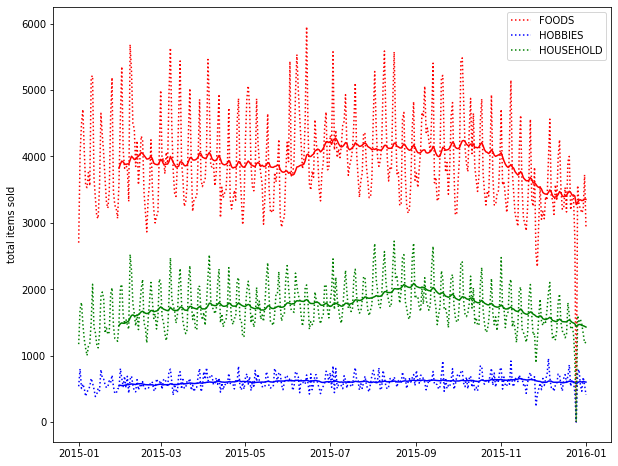

In [369]:
categories = sales_by_cat_CA3.columns[:3]
colors = ['red', 'blue', 'green']

fig, ax = plt.subplots(1, 1, figsize=(10, 8))

for cat, color in zip(categories, colors):
    ax.plot(sales_by_cat_CA3.index, sales_by_cat_CA3[cat], ':', label='{}'.format(cat), color=color)
    ax.plot(sales_by_cat_CA3.index, sales_by_cat_CA3[cat].rolling(30).mean(), color=color)
    
ax.set_ylabel('total items sold')
ax.legend()
plt.show()

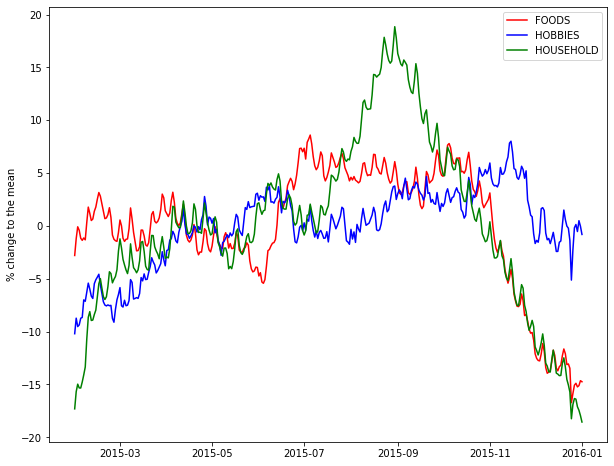

In [367]:
categories = sales_by_cat_CA3.columns[:3]
colors = ['red', 'blue', 'green']

fig, ax = plt.subplots(1, 1, figsize=(10, 8))

for cat, color in zip(categories, colors):
    ax.plot(sales_by_cat_CA3.index, (sales_by_cat_CA3[cat].rolling(30).mean() / sales_by_cat_CA3[cat].rolling(30).mean().mean() - 1)*100, label='{}'.format(cat), color=color)
    
ax.set_ylabel('% change to the mean')
ax.legend()
plt.show()

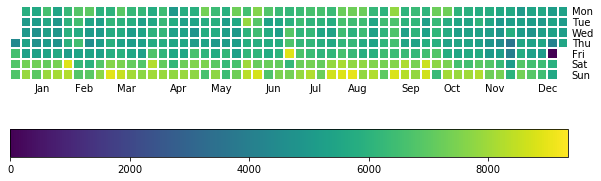

In [331]:
# visualize the CA-3 store using the calendar heatmap

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
calmap.yearplot(sales_by_store['CA_3'], year=2015, ax=ax, fillcolor='grey', cmap="viridis")
fig.colorbar(ax.get_children()[1], ax=ax, orientation='horizontal')
plt.show()

# sell_prices

Notes from the official guide

File 2: “sell_prices.csv”
Contains information about the price of the products sold per store and date.
- store_id: The id of the store where the product is sold. 
- item_id: The id of the product.
- wm_yr_wk: The id of the week.
- sell_price: The price of the product for the given week/store. The price is provided per week (average across seven days). If not available, this means that the product was not sold during the examined week. Note that although prices are constant at weekly basis, they may change through time (both training and test set).  

In [6]:
sell_prices = pd.read_csv('../input_data/sell_prices.csv')

In [7]:
sell_prices.head()

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


In [53]:
# check NULL values

sell_prices.isna().sum()

store_id      0
item_id       0
wm_yr_wk      0
sell_price    0
dtype: int64

In [66]:
sell_prices.describe()

,wm_yr_wk,sell_price
count,6.841121e+06,6.841121e+06
mean,1.138294e+04,4.410952e+00
std,1.486100e+02,3.408814e+00
min,1.110100e+04,1.000000e-02
25%,1.124700e+04,2.180000e+00
50%,1.141100e+04,3.470000e+00
75%,1.151700e+04,5.840000e+00
max,1.162100e+04,1.073200e+02


In [11]:
len(sell_prices)

6841121

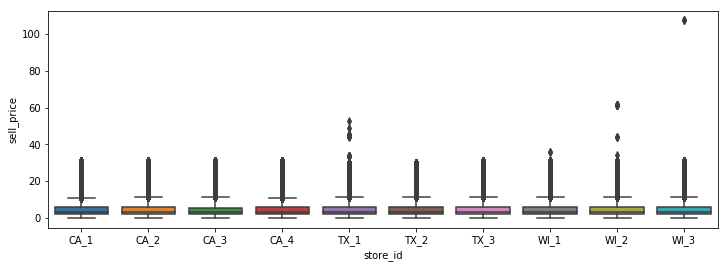

In [61]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
sns.boxplot(x='store_id', y='sell_price', data=sell_prices, ax=ax)

In [64]:
## get cat_id by joinning with another DF 

sell_prices_with_cat_id = sell_prices.merge(sales[['item_id', 'cat_id']], on='item_id', how='left')

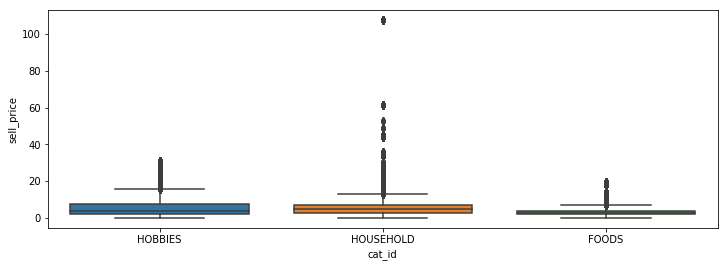

In [65]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
sns.boxplot(x='cat_id', y='sell_price', data=sell_prices_with_cat_id, ax=ax)

# Sample_submission

In [303]:
sample_submission = pd.read_csv('../input_data/sample_submission.csv')

In [304]:
sample_submission.head()

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,HOBBIES_1_001_CA_1_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,HOBBIES_1_002_CA_1_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,HOBBIES_1_004_CA_1_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,HOBBIES_1_005_CA_1_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [305]:
sample_submission.shape

(60980, 29)